# Import Libraries

In [25]:
import yfinance as yf
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import ta
#import talib
from fracdiff.sklearn import Fracdiff
import numpy as np
import pandas_ta

# Download data

In [26]:
aapl = yf.download('AAPL', start='2017-01-01', end='2024-01-01')

c:\Conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [27]:
sp500 = yf.download('^GSPC', start='2017-01-01', end='2024-01-01')

# Align AAPL data with S&P 500 data
aapl['SP500'] = sp500['Close'].reindex(aapl.index).fillna(method='ffill')
aapl['SP500_diff'] = aapl['SP500'].diff()


c:\Conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\535107.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl['SP500'] = sp500['Close'].reindex(aapl.index).fillna(method='ffill')


# Adding Technnical Indicators

In [28]:
aapl = add_all_ta_features(
    aapl, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

c:\Conda\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [29]:
aapl['Supertrend7_3'] = pandas_ta.supertrend(aapl['High'], aapl['Low'], aapl['Close'], length=7, multiplier=3)['SUPERT_7_3.0']
aapl['Supertrend10_3'] = pandas_ta.supertrend(aapl['High'], aapl['Low'], aapl['Close'], length=10, multiplier=3)['SUPERT_10_3.0']

# Data Labelling

In [30]:
aapl["Tomorrow"] = aapl["Close"].shift(-1)
aapl['diff'] = aapl['Close'].diff()
aapl["Target"] = (aapl["Tomorrow"]> aapl["Close"]).astype(int)

In [31]:
aapl.dropna(inplace=True)

# Data Preprocessing

In [32]:
aapl['trend_sma_fast-close'] = aapl['trend_sma_fast'] - aapl['Close']
aapl['trend_sma_slow-close'] = aapl['trend_sma_slow'] - aapl['Close']
aapl['trend_ema_fast-close'] = aapl['trend_ema_fast'] - aapl['Close']
aapl['trend_ema_slow-close'] = aapl['trend_ema_slow'] - aapl['Close']
aapl['volatility_bbm-close'] = aapl['volatility_bbm'] - aapl['Close']
aapl['volatility_bbh-close'] = aapl['volatility_bbh'] - aapl['Close']
aapl['volatility_bbl-close'] = aapl['volatility_bbl'] - aapl['Close']
aapl['Supertrend7_3-close'] = aapl['Supertrend7_3'] - aapl['Close']
aapl['Supertrend10_3-close'] = aapl['Supertrend10_3'] - aapl['Close']

C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1269999952.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl['volatility_bbh-close'] = aapl['volatility_bbh'] - aapl['Close']
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1269999952.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl['volatility_bbl-close'] = aapl['volatility_bbl'] - aapl['Close']
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1269999952.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [33]:
# Initialize the Fracdiff object
fd = Fracdiff(0.9)

"""# Apply fractional differencing to the 'Close' price
aapl['Close_fdiff'] = fd.fit_transform(aapl[['Close']].values)"""

"# Apply fractional differencing to the 'Close' price\naapl['Close_fdiff'] = fd.fit_transform(aapl[['Close']].values)"

In [34]:
for indicator in aapl.columns:
    prob = adfuller(aapl[indicator])[1]
    print(indicator, prob)
    if prob > 0.05 and indicator != "Tomorrow" and indicator != "Target":
        fdindicator = indicator + '_fdiff'
        #pctindicator = indicator + '_pctdiff'
        aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
        #aapl[pctindicator] = aapl[indicator].pct_change()
        aapl.drop(columns=indicator, inplace=True)

aapl = aapl.iloc[2:]

C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

Open 0.9300260681487436
High 0.9146674472503864
Low 0.92216238848558
Close 0.9231873265560082
Adj Close 0.9298487790667589
Volume 1.7347497803841492e-06
SP500 0.7996583635454035
SP500_diff 4.0836065314915545e-24
volume_adi 0.902760323650158
volume_obv 0.28361439651327713
volume_cmf 2.413395980269718e-07
volume_fi 7.724158381122942e-12
volume_em 1.618912597973552e-29
volume_sma_em 6.94765366930031e-15
volume_vpt 0.5539162606976114


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

volume_vwap 0.9211699344596762
volume_mfi 3.9543973110006337e-14
volume_nvi 0.9845638482128609
volatility_bbm 0.9383637676286709
volatility_bbh 0.8980014210339865
volatility_bbl 0.9477423274389541
volatility_bbw 1.6451272277140235e-05
volatility_bbp 3.537101748354336e-14


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

volatility_bbhi 0.0
volatility_bbli 4.7490534076546233e-26
volatility_kcc 0.9303144500081303
volatility_kch 0.9233826434378425
volatility_kcl 0.9324435206233288
volatility_kcw 0.0008228779074085824
volatility_kcp 3.0253174868572344e-18
volatility_kchi 6.135762991500929e-29


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

volatility_kcli 1.8374925571327748e-28
volatility_dcl 0.9376724622681958
volatility_dch 0.9250801469151347
volatility_dcm 0.9389885312453062
volatility_dcw 0.000135355364865945
volatility_dcp 1.925655755895612e-12
volatility_atr 0.09497431766406178
volatility_ui 1.0810113348917476e-07
trend_macd 8.355053438886116e-09


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

trend_macd_signal 9.892430775904263e-08
trend_macd_diff 1.1247733254569772e-16
trend_sma_fast 0.920409540692167
trend_sma_slow 0.9640105704655287
trend_ema_fast 0.9300648495486843
trend_ema_slow 0.9419655388958196
trend_vortex_ind_pos 1.824097689549984e-12
trend_vortex_ind_neg 3.5117401395034664e-12
trend_vortex_ind_diff 3.94184966622296e-13


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

trend_trix 5.937619767069554e-09
trend_mass_index 3.030812882280436e-09
trend_dpo 2.0718642023265245e-27
trend_kst 2.948527232971224e-09
trend_kst_sig 4.517483212919105e-08
trend_kst_diff 1.5257181400697871e-16
trend_ichimoku_conv 0.9292062561545256
trend_ichimoku_base 0.9402619049713306


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

trend_ichimoku_a 0.9294123269060837
trend_ichimoku_b 0.9332920808081995
trend_stc 2.301952096501479e-20
trend_adx 5.8782381137069706e-08
trend_adx_pos 2.5912989321869096e-11
trend_adx_neg 3.746319495193457e-11
trend_cci 1.528693659722872e-16
trend_visual_ichimoku_a 0.937313002702157


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

trend_visual_ichimoku_b 0.9587845018700323
trend_aroon_up 3.2619986099790443e-12
trend_aroon_down 3.234621036645647e-12
trend_aroon_ind 3.8416617620309643e-11
trend_psar_up 0.9231711470896627
trend_psar_down 0.9107849586682741
trend_psar_up_indicator 9.257077756210789e-24
trend_psar_down_indicator 1.2459920445100068e-21
momentum_rsi 2.577865540639046e-11
momentum_stoch_rsi 1.5623507999716928e-15
momentum_stoch_rsi_k 1.9085021564712826e-13
momentum_stoch_rsi_d 8.466050243723993e-15
momentum_tsi 1.8197424346823123e-08
momentum_uo 5.118139251982164e-10
momentum_stoch 3.295012859161521e-11
momentum_stoch_signal 9.409089646544877e-10
momentum_wr 3.295012859162073e-11
momentum_ao 2.67570587948489e-10
momentum_roc 1.809265483962445e-08
momentum_ppo 3.5757663383884963e-08
momentum_ppo_signal 1.2189481631336817e-08
momentum_ppo_hist 6.081831961436855e-17
momentum_pvo 3.152595420233419e-20
momentum_pvo_signal 3.892340854456355e-18
momentum_pvo_hist 7.366676567946564e-25
momentum_kama 0.935021810

C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_10540\1449536577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

Target 0.0
trend_sma_fast-close 3.056083442525513e-17
trend_sma_slow-close 3.790826795516416e-12
trend_ema_fast-close 1.1050616010314438e-11
trend_ema_slow-close 2.1492772568541606e-09
volatility_bbm-close 2.046155686338494e-15
volatility_bbh-close 1.2277133125293015e-05
volatility_bbl-close 9.933961035774455e-08
Supertrend7_3-close 9.021748626361364e-12
Supertrend10_3-close 3.218848938409203e-09


In [35]:
labels = aapl['Target'].tolist()
aapl.drop(columns="Target",inplace=True)
aapl.drop(columns="Tomorrow",inplace=True)

In [36]:
aapl.columns

Index(['Volume', 'SP500_diff', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_mfi', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi',
       ...
       'trend_ichimoku_a_fdiff', 'trend_ichimoku_b_fdiff',
       'trend_visual_ichimoku_a_fdiff', 'trend_visual_ichimoku_b_fdiff',
       'trend_psar_up_fdiff', 'trend_psar_down_fdiff', 'momentum_kama_fdiff',
       'others_cr_fdiff', 'Supertrend7_3_fdiff', 'Supertrend10_3_fdiff'],
      dtype='object', length=106)

In [37]:
len(aapl)

1747

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(aapl)

# Creating Sequences for LSTM

In [39]:
sequence_length = 60

# Function to create sequences
def create_sequences(data, labels, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length):
        x = data[i:(i+seq_length)]
        y = labels[i+seq_length]
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)


X_all, y_all = create_sequences(aapl, labels, sequence_length)

In [40]:
windowLength = 1500
validationLength = 30
slidingLength = 30
test_length = len(X_all) - windowLength - validationLength
X_train_list = []
y_train_list = []
X_val_list = []
y_val_list = []
X_test_list = []
y_test_list = []
for i in range(0,test_length,slidingLength):
    X_train_list.append(X_all[i:windowLength+i])
    y_train_list.append(y_all[i:windowLength+i])
    X_val_list.append(X_all[windowLength+i : windowLength + i + validationLength])
    y_val_list.append(y_all[windowLength+i : windowLength + i + validationLength])
    X_test_list.append(X_all[ windowLength + i + validationLength : min(windowLength + i + validationLength + slidingLength, len(X_all))])
    y_test_list.append(y_all[ windowLength + i + validationLength : min(windowLength + i + validationLength + slidingLength, len(X_all))])
    print(windowLength+i+slidingLength)
    if windowLength+i+slidingLength+validationLength >= len(X_all):
        break


1530
1560
1590
1620
1650
1680


In [41]:
test_length, len(X_train_list), len(X_all)

(157, 6, 1687)

# DataLoader for LSTM 

In [42]:
import torch
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    

In [43]:
def createDataLoader(X_train, y_train, X_val, y_val, X_test,y_test):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    # Create the dataset
    traindataset = StockDataset(X_train_tensor, y_train_tensor)

    # Create the DataLoader
    trainLoader = DataLoader(traindataset, batch_size=32, shuffle=False)

    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

    # Create the dataset
    valdataset = StockDataset(X_val_tensor, y_val_tensor)

    # Create the DataLoader
    valLoader = DataLoader(valdataset, batch_size=32, shuffle=False)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    # Create the dataset
    testdataset = StockDataset(X_test_tensor, y_test_tensor)

    # Create the DataLoader
    testLoader = DataLoader(testdataset, batch_size=32, shuffle=False)
    return trainLoader, valLoader, testLoader

# LSTM Model Training

In [44]:
import torch.nn as nn

class StockPredictor(nn.Module):
    def __init__(self, num_features, hidden_units, num_layers):
        super(StockPredictor, self).__init__()
        self.lstm = nn.LSTM(num_features, hidden_units, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_units, 1)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return torch.sigmoid(out)

num_features = X_train_list[0].shape[-1]  # Number of features
hidden_units = 200  # Number of hidden units
num_layers = 2  # Number of LSTM layers



In [45]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from typing import Tuple
from sklearn.metrics import accuracy_score

# Assuming 'StockPredictor' is a class derived from nn.Module
# and 'trainLoader' is an instance of DataLoader

def train_model(
    model: nn.Module, 
    train_loader: DataLoader, 
    val_loader: DataLoader, 
    criterion: nn.Module, 
    optimizer: torch.optim.Optimizer, 
    num_epochs: int) -> Tuple[nn.Module, list]:
    """
    Train the model and return the model with the minimum loss.

    Parameters:
    - model: The neural network model to train.
    - train_loader: DataLoader for the training data.
    - criterion: Loss function.
    - optimizer: Optimizer.
    - num_epochs: Number of epochs to train.
    
    Returns:
    - min_loss_model: The model with the minimum loss achieved during training.
    - epoch_loss_history: List of loss values recorded at the end of each epoch.
    """
    min_loss = float('inf')
    minValLoss = float('inf')
    min_loss_model = StockPredictor(num_features, hidden_units, num_layers)  # Assumes these are attributes of your model
    minValLossModel = StockPredictor(num_features, hidden_units, num_layers)
    maxAccuracyModel = StockPredictor(num_features, hidden_units, num_layers)
    epoch_loss_history = []
    maxaccuracy = 0

    for epoch in range(num_epochs):
        model.train()
        for features, labels in train_loader:
            # Forward pass
            predictions = model(features).squeeze()
            loss = criterion(predictions, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss_history.append(loss.item())
        if loss.item() < min_loss:
            min_loss = loss.item()
            min_loss_model.load_state_dict(model.state_dict())  # Copy model weights
        
        model.eval()
        valPredictions = []
        actuals = []
        validation_loss = 0.0
        with torch.no_grad():  # No need to track the gradients
            for features, labels in val_loader:
                # Forward pass to get output/prediction
                outputs = model(features).squeeze()
                val_loss = criterion(outputs, labels)
                validation_loss += val_loss.item()
                
                # Since we're using sigmoid, we will round the outputs to get the binary class
                predicted_classes = torch.round(outputs)
                
                if predicted_classes.ndim == 0:
                    predicted_classes = predicted_classes.unsqueeze(0)

                # Store valPredictions and actual labels
                valPredictions.extend(predicted_classes.cpu().numpy())
                actuals.extend(labels.cpu().numpy())
        accuracy = accuracy_score(np.array(actuals), np.array(valPredictions))
        validation_loss /= len(val_loader)

        if minValLoss >= validation_loss:
            minValLoss = validation_loss
            minValLossModel.load_state_dict(model.state_dict())
        if maxaccuracy <= accuracy:
            maxaccuracy = accuracy
            maxAccuracyModel.load_state_dict(model.state_dict())
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, minimum Loss: {min_loss:.4f}, accuracy: {accuracy:.4f} maxaccuracy: {maxaccuracy:.4f}  Validation Loss: {validation_loss:.4f}, Minimum Validation Loss: {minValLoss:.4f}')

    return minValLossModel, epoch_loss_history, maxaccuracy, minValLoss



# minLossModel, loss_history = train_model(model, trainLoader, criterion, optimizer, num_epochs)

# Evaluation

In [46]:
import torch
from torch.utils.data import DataLoader

def evaluate_model(model: torch.nn.Module, test_loader: DataLoader) -> Tuple[list, list, list]:
    """
    Evaluate the model on the test set.

    Parameters:
    - model: The trained neural network model for evaluation.
    - test_loader: DataLoader for the test data.

    Returns:
    - probabilities: List of raw output probabilities from the model.
    - predictions: List of predicted classes based on the output probabilities.
    - actuals: List of actual labels.
    """
    model.eval()  # Set the model to evaluation mode

    probabilities = []
    predictions = []
    actuals = []

    with torch.no_grad():  # No need to track the gradients
        for features, labels in test_loader:
            # Forward pass to get output/prediction
            outputs = model(features).squeeze()

            # Since we're using sigmoid, we will round the outputs to get the binary class
            predicted_classes = torch.round(outputs)
            
            # In case of single-element batches, add an extra dimension
            if predicted_classes.ndim == 0:
                predicted_classes = predicted_classes.unsqueeze(0)

            # Store predictions and actual labels
            probabilities.extend(outputs.cpu().numpy())
            predictions.extend(predicted_classes.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    return probabilities, predictions, actuals

# Usage example
# Assuming 'minLossModel' is the trained model and 'testLoader' is defined elsewhere

# probabilities, predictions, actuals = evaluate_model(minLossModel, testLoader)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score

def evaluation(predictions, probabilities, actuals, verbose=1, threshold = 0.5):
    probabilities_array = np.array(probabilities)
    predictions_array = (probabilities_array >= threshold).astype(int)
    actuals_array = np.array(actuals)

    # Calculate various classification metrics
    accuracy = accuracy_score(actuals_array, predictions_array)
    precision = precision_score(actuals_array, predictions_array)
    recall = recall_score(actuals_array, predictions_array)
    f1 = f1_score(actuals_array, predictions_array)
    conf_matrix = confusion_matrix(actuals_array, predictions_array)
    auc_score = roc_auc_score(actuals_array, probabilities_array)

    # Print out the metrics
    if verbose:
        print(f'Accuracy: {accuracy:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')
        print(f'AUC Score: {auc_score:.4f}')
        print(f'Confusion Matrix:\n{conf_matrix}')

In [50]:
from tqdm import tqdm

# Define the model
num_features = X_train_list[0].shape[-1]  # Number of features
hidden_units = 100  # Number of hidden units
num_layers = 2  # Number of LSTM layers

num_epochs = 200
probabilities, predictions, actuals, loss_history = [], [] ,[], []
for i in tqdm(range(len(X_train_list))):
    print(f'round {i+1}')
    trainLoader, valLoader, testLoader = createDataLoader(X_train_list[i],y_train_list[i],X_val_list[i],y_val_list[i],X_test_list[i],y_test_list[i])
    accuracy, validationLoss,loss_history_tmp = 0,float('inf'), []
    while (accuracy < 0.6 or validationLoss > 0.68):
        model = StockPredictor(num_features, hidden_units, num_layers)
        criterion = nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)
        model, loss_history_tmp, accuracy, validationLoss = train_model(model, trainLoader,valLoader, criterion, optimizer, num_epochs)
    probabilities_tmp, predictions_tmp, actuals_tmp = evaluate_model(model, testLoader)
    probabilities.extend(probabilities_tmp)
    predictions.extend(predictions_tmp)
    actuals.extend(actuals_tmp)
    loss_history.append(loss_history_tmp)
    print('threshold = 0.5')
    evaluation(predictions=predictions_tmp, probabilities=probabilities_tmp, actuals=actuals_tmp)
    print('\nthreshold = 0.55')
    evaluation(predictions=predictions_tmp, probabilities=probabilities_tmp, actuals=actuals_tmp, threshold=0.55)

    

  0%|          | 0/6 [00:00<?, ?it/s]

round 1
Epoch [10/200], Loss: 0.6780, minimum Loss: 0.6780, accuracy: 0.3667 maxaccuracy: 0.3667  Validation Loss: 0.7065, Minimum Validation Loss: 0.7006
Epoch [20/200], Loss: 0.6686, minimum Loss: 0.6686, accuracy: 0.3667 maxaccuracy: 0.3667  Validation Loss: 0.7154, Minimum Validation Loss: 0.7006
Epoch [30/200], Loss: 0.6447, minimum Loss: 0.6447, accuracy: 0.3667 maxaccuracy: 0.3667  Validation Loss: 0.7633, Minimum Validation Loss: 0.7006
Epoch [40/200], Loss: 0.6330, minimum Loss: 0.6330, accuracy: 0.3667 maxaccuracy: 0.3667  Validation Loss: 0.8182, Minimum Validation Loss: 0.7006
Epoch [50/200], Loss: 0.6214, minimum Loss: 0.6214, accuracy: 0.3667 maxaccuracy: 0.3667  Validation Loss: 1.0014, Minimum Validation Loss: 0.7006
Epoch [60/200], Loss: 0.6313, minimum Loss: 0.6186, accuracy: 0.4667 maxaccuracy: 0.6000  Validation Loss: 0.7600, Minimum Validation Loss: 0.6678
Epoch [70/200], Loss: 0.6097, minimum Loss: 0.6097, accuracy: 0.3667 maxaccuracy: 0.6000  Validation Loss: 1.1

c:\Conda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 17%|█▋        | 1/6 [02:34<12:51, 154.31s/it]

Epoch [200/200], Loss: 0.5395, minimum Loss: 0.5274, accuracy: 0.3667 maxaccuracy: 0.6000  Validation Loss: 2.0303, Minimum Validation Loss: 0.6678
threshold = 0.5
Accuracy: 0.4000
Precision: 1.0000
Recall: 0.0526
F1 Score: 0.1000
AUC Score: 0.5646
Confusion Matrix:
[[11  0]
 [18  1]]

threshold = 0.55
Accuracy: 0.3667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC Score: 0.5646
Confusion Matrix:
[[11  0]
 [19  0]]
round 2
Epoch [10/200], Loss: 0.6924, minimum Loss: 0.6924, accuracy: 0.5000 maxaccuracy: 0.6333  Validation Loss: 0.6940, Minimum Validation Loss: 0.6828
Epoch [20/200], Loss: 0.6827, minimum Loss: 0.6827, accuracy: 0.3667 maxaccuracy: 0.6333  Validation Loss: 0.7087, Minimum Validation Loss: 0.6828
Epoch [30/200], Loss: 0.6740, minimum Loss: 0.6740, accuracy: 0.3667 maxaccuracy: 0.6333  Validation Loss: 0.7374, Minimum Validation Loss: 0.6828
Epoch [40/200], Loss: 0.6743, minimum Loss: 0.6729, accuracy: 0.3667 maxaccuracy: 0.6333  Validation Loss: 0.7918, Minimum Va

c:\Conda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 33%|███▎      | 2/6 [17:34<39:32, 593.01s/it]

Epoch [200/200], Loss: 0.4466, minimum Loss: 0.4302, accuracy: 0.3667 maxaccuracy: 0.6667  Validation Loss: 1.8034, Minimum Validation Loss: 0.6772
threshold = 0.5
Accuracy: 0.4333
Precision: 0.4333
Recall: 1.0000
F1 Score: 0.6047
AUC Score: 0.7014
Confusion Matrix:
[[ 0 17]
 [ 0 13]]

threshold = 0.55
Accuracy: 0.5667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC Score: 0.7014
Confusion Matrix:
[[17  0]
 [13  0]]
round 3
Epoch [10/200], Loss: 0.6788, minimum Loss: 0.6774, accuracy: 0.4333 maxaccuracy: 0.4333  Validation Loss: 0.6978, Minimum Validation Loss: 0.6978
Epoch [20/200], Loss: 0.6821, minimum Loss: 0.6774, accuracy: 0.5000 maxaccuracy: 0.5000  Validation Loss: 0.6925, Minimum Validation Loss: 0.6925
Epoch [30/200], Loss: 0.6914, minimum Loss: 0.6774, accuracy: 0.4667 maxaccuracy: 0.5000  Validation Loss: 0.6911, Minimum Validation Loss: 0.6901
Epoch [40/200], Loss: 0.6781, minimum Loss: 0.6774, accuracy: 0.4667 maxaccuracy: 0.5000  Validation Loss: 0.7117, Minimum Va

 50%|█████     | 3/6 [27:32<29:45, 595.30s/it]

Epoch [200/200], Loss: 0.6692, minimum Loss: 0.6580, accuracy: 0.6667 maxaccuracy: 0.6667  Validation Loss: 0.6722, Minimum Validation Loss: 0.6576
threshold = 0.5
Accuracy: 0.5667
Precision: 0.8000
Recall: 0.4211
F1 Score: 0.5517
AUC Score: 0.6746
Confusion Matrix:
[[ 9  2]
 [11  8]]

threshold = 0.55
Accuracy: 0.4667
Precision: 0.7143
Recall: 0.2632
F1 Score: 0.3846
AUC Score: 0.6746
Confusion Matrix:
[[ 9  2]
 [14  5]]
round 4
Epoch [10/200], Loss: 0.6948, minimum Loss: 0.6928, accuracy: 0.6333 maxaccuracy: 0.6333  Validation Loss: 0.6821, Minimum Validation Loss: 0.6820
Epoch [20/200], Loss: 0.6891, minimum Loss: 0.6891, accuracy: 0.6000 maxaccuracy: 0.7000  Validation Loss: 0.6837, Minimum Validation Loss: 0.6820
Epoch [30/200], Loss: 0.6858, minimum Loss: 0.6858, accuracy: 0.6000 maxaccuracy: 0.7000  Validation Loss: 0.6824, Minimum Validation Loss: 0.6820
Epoch [40/200], Loss: 0.6688, minimum Loss: 0.6688, accuracy: 0.5000 maxaccuracy: 0.7000  Validation Loss: 0.6975, Minimum Va

 67%|██████▋   | 4/6 [30:02<13:58, 419.48s/it]

Epoch [200/200], Loss: 0.3776, minimum Loss: 0.3776, accuracy: 0.5333 maxaccuracy: 0.7000  Validation Loss: 0.8519, Minimum Validation Loss: 0.6506
threshold = 0.5
Accuracy: 0.4667
Precision: 0.5333
Recall: 0.4706
F1 Score: 0.5000
AUC Score: 0.4389
Confusion Matrix:
[[6 7]
 [9 8]]

threshold = 0.55
Accuracy: 0.4667
Precision: 0.5455
Recall: 0.3529
F1 Score: 0.4286
AUC Score: 0.4389
Confusion Matrix:
[[ 8  5]
 [11  6]]
round 5
Epoch [10/200], Loss: 0.6684, minimum Loss: 0.6684, accuracy: 0.5667 maxaccuracy: 0.5667  Validation Loss: 0.6819, Minimum Validation Loss: 0.6819
Epoch [20/200], Loss: 0.6336, minimum Loss: 0.6336, accuracy: 0.5667 maxaccuracy: 0.5667  Validation Loss: 0.6836, Minimum Validation Loss: 0.6785
Epoch [30/200], Loss: 0.6176, minimum Loss: 0.6176, accuracy: 0.5667 maxaccuracy: 0.5667  Validation Loss: 0.7193, Minimum Validation Loss: 0.6785
Epoch [40/200], Loss: 0.6075, minimum Loss: 0.6075, accuracy: 0.5667 maxaccuracy: 0.5667  Validation Loss: 0.7498, Minimum Valida

 83%|████████▎ | 5/6 [37:29<07:09, 429.36s/it]

Epoch [200/200], Loss: 0.4408, minimum Loss: 0.4358, accuracy: 0.6667 maxaccuracy: 0.7333  Validation Loss: 0.7317, Minimum Validation Loss: 0.5735
threshold = 0.5
Accuracy: 0.5333
Precision: 0.6111
Recall: 0.6111
F1 Score: 0.6111
AUC Score: 0.5185
Confusion Matrix:
[[ 5  7]
 [ 7 11]]

threshold = 0.55
Accuracy: 0.4667
Precision: 0.5625
Recall: 0.5000
F1 Score: 0.5294
AUC Score: 0.5185
Confusion Matrix:
[[5 7]
 [9 9]]
round 6
Epoch [10/200], Loss: 0.6740, minimum Loss: 0.6740, accuracy: 0.6000 maxaccuracy: 0.6000  Validation Loss: 0.6854, Minimum Validation Loss: 0.6847
Epoch [20/200], Loss: 0.6632, minimum Loss: 0.6632, accuracy: 0.5667 maxaccuracy: 0.6333  Validation Loss: 0.6864, Minimum Validation Loss: 0.6847
Epoch [30/200], Loss: 0.6490, minimum Loss: 0.6490, accuracy: 0.5333 maxaccuracy: 0.6333  Validation Loss: 0.6847, Minimum Validation Loss: 0.6847
Epoch [40/200], Loss: 0.6296, minimum Loss: 0.6296, accuracy: 0.5000 maxaccuracy: 0.6333  Validation Loss: 0.6938, Minimum Valida

100%|██████████| 6/6 [44:57<00:00, 449.56s/it]

Epoch [200/200], Loss: 0.4345, minimum Loss: 0.4150, accuracy: 0.4667 maxaccuracy: 0.6667  Validation Loss: 1.7392, Minimum Validation Loss: 0.6719
threshold = 0.5
Accuracy: 0.2857
Precision: 0.2857
Recall: 1.0000
F1 Score: 0.4444
AUC Score: 0.8000
Confusion Matrix:
[[0 5]
 [0 2]]

threshold = 0.55
Accuracy: 0.7143
Precision: 0.5000
Recall: 0.5000
F1 Score: 0.5000
AUC Score: 0.8000
Confusion Matrix:
[[4 1]
 [1 1]]


In [51]:
evaluation(predictions, probabilities, actuals, threshold=0.5)

Accuracy: 0.4713
Precision: 0.5309
Recall: 0.4886
F1 Score: 0.5089
AUC Score: 0.4883
Confusion Matrix:
[[31 38]
 [45 43]]


# Loss Curve

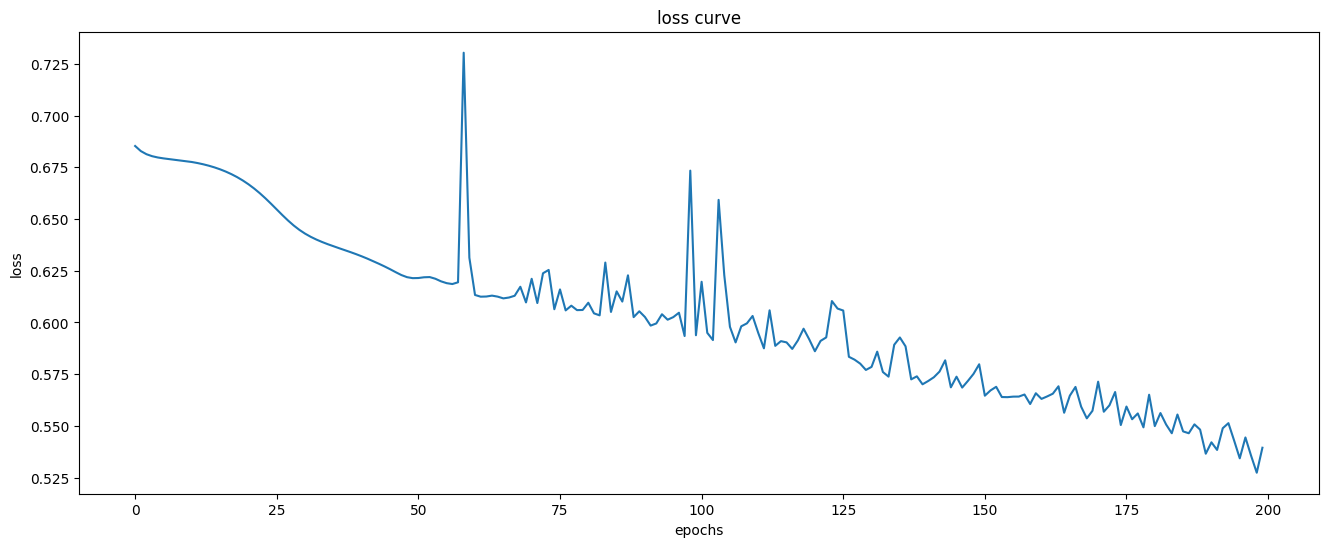

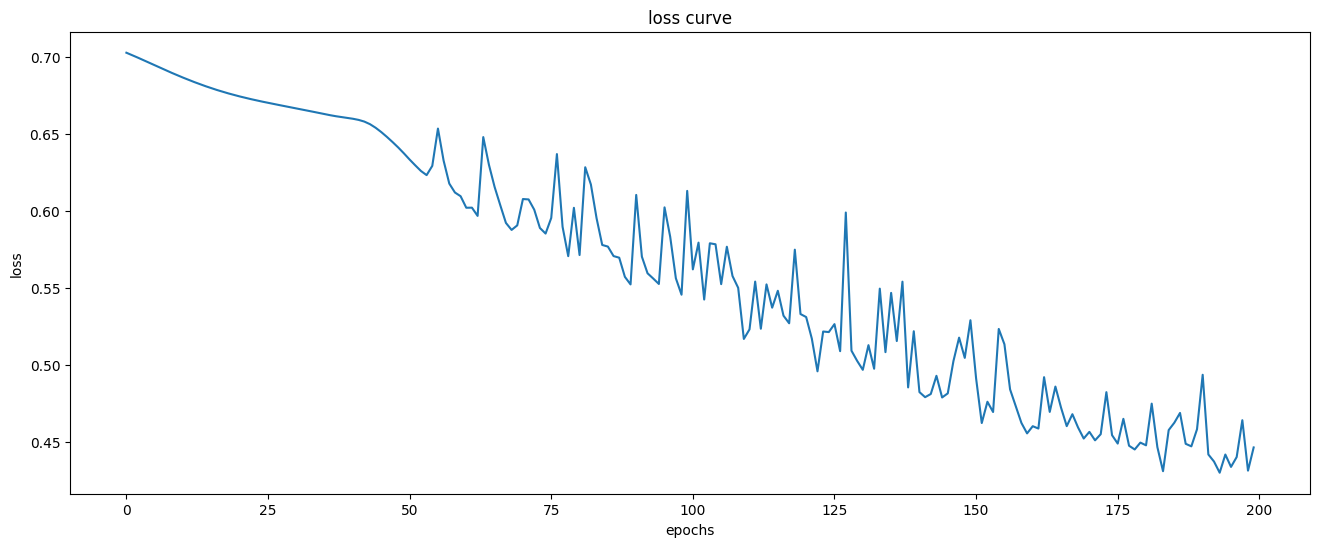

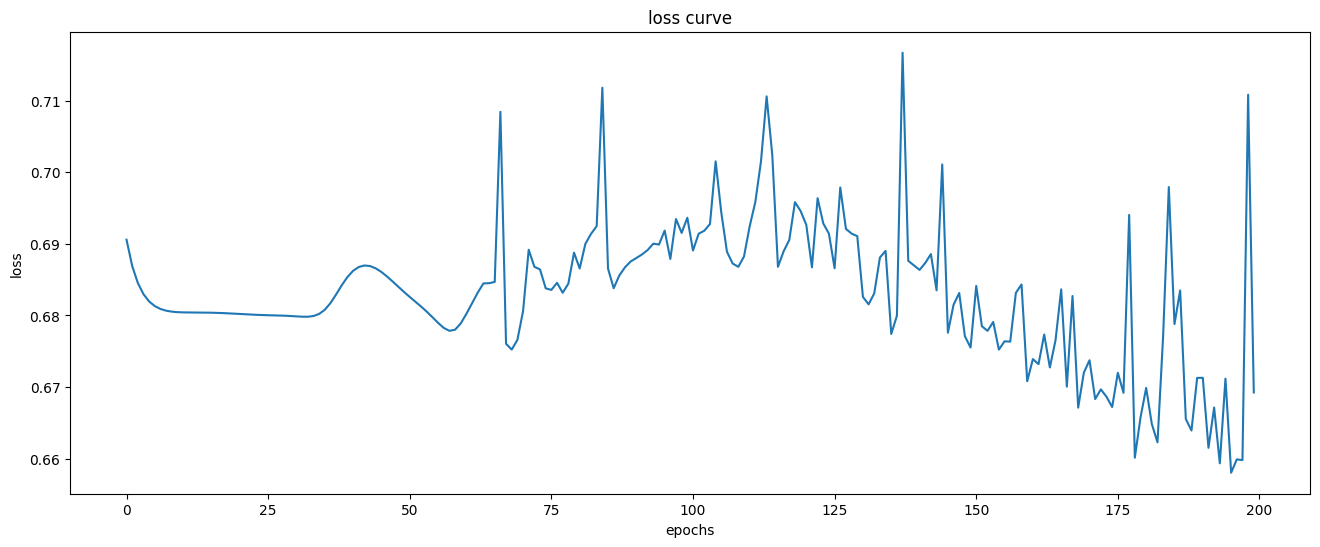

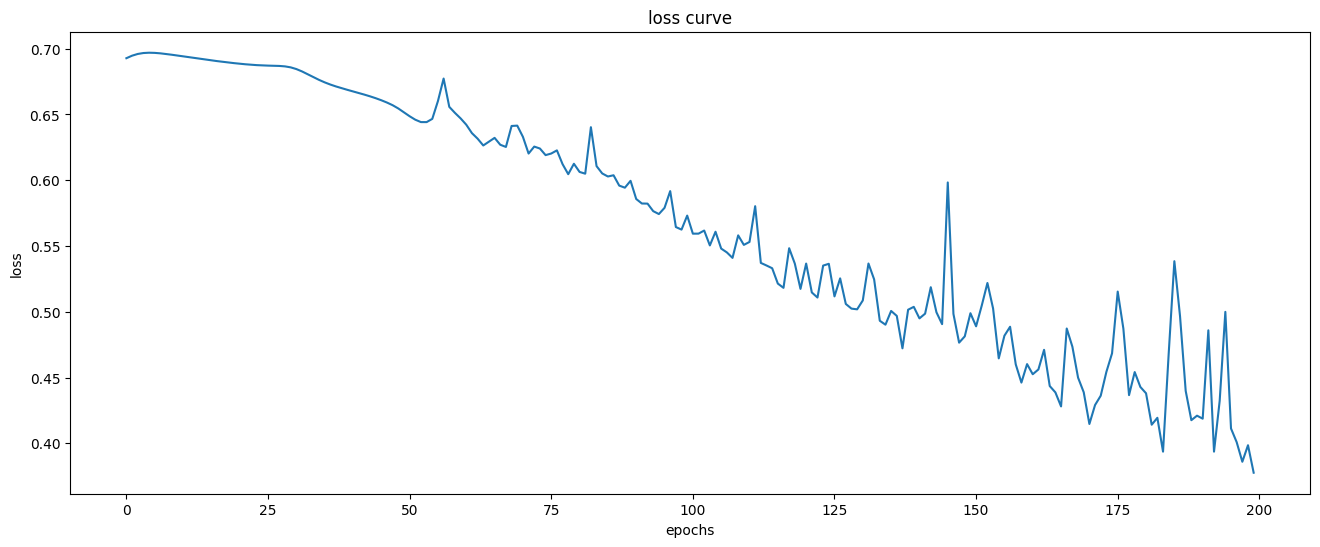

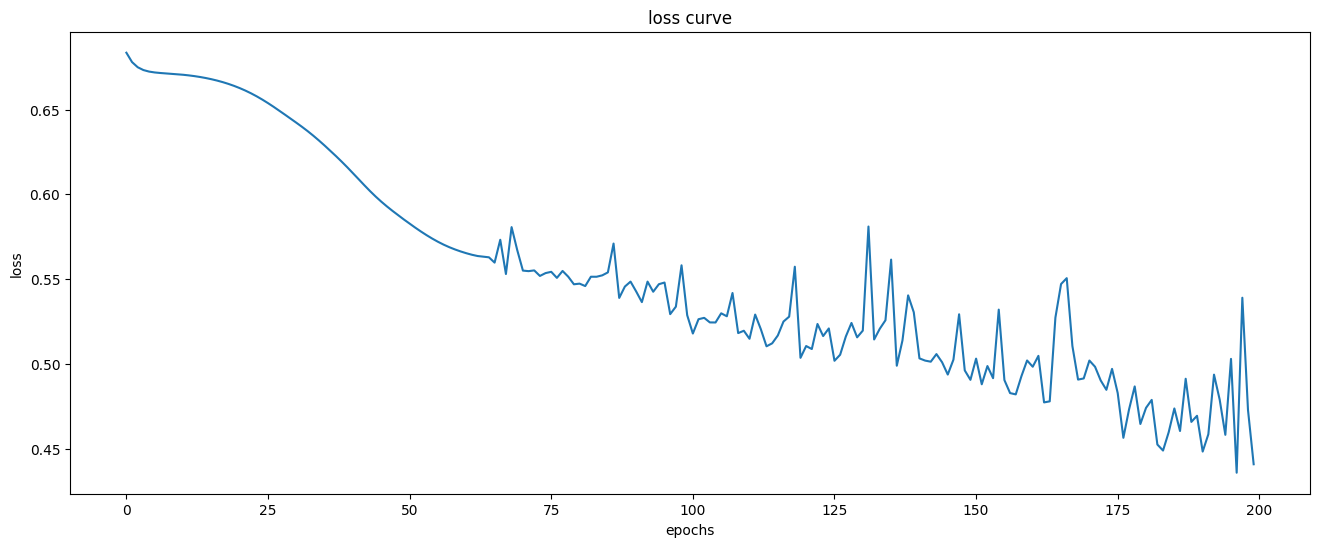

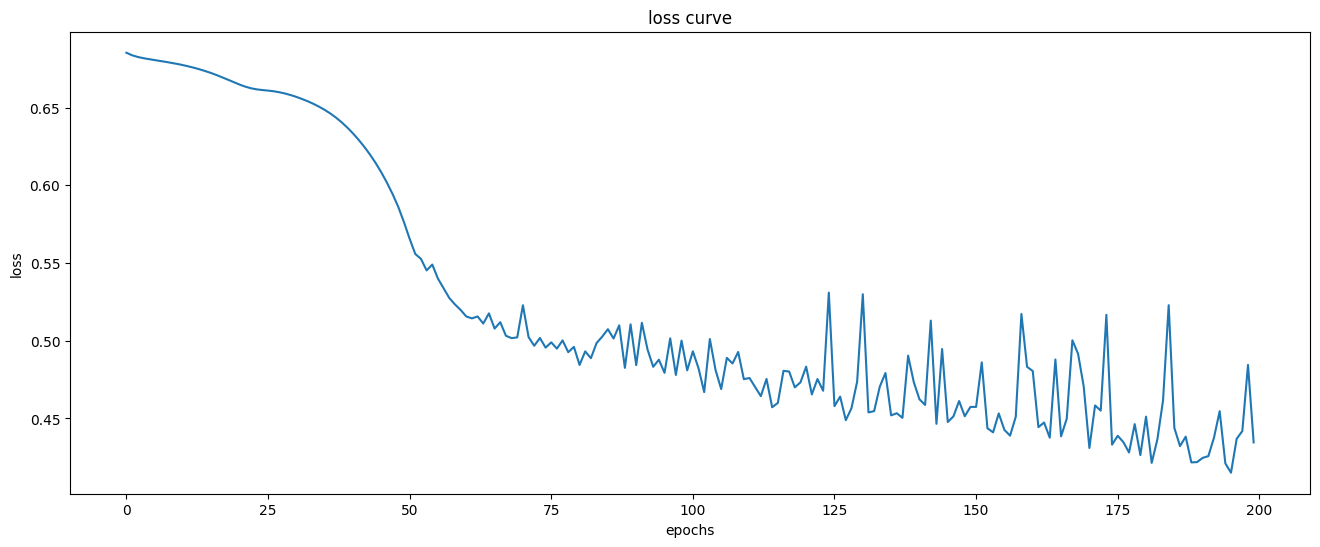

In [52]:
for i in range(len(loss_history)):
    plt.figure(figsize=(16,6))
    plt.plot(loss_history[i])
    plt.title("loss curve")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

In [53]:

probabilities_array = np.array(probabilities)

predictions_array = (probabilities_array >= 0.5).astype(int)
actuals_array = np.array(actuals)

# Download AAPL closing prices
aapl_closing = yf.download('AAPL', start='2018-01-01', end='2024-01-01')["Close"]

# Focus on the last 5% of the period
last_five_percent = aapl_closing.tail(test_length+1)

# Calculate daily returns for the last 5%
actuals_daily_returns = np.diff(last_five_percent.values) / last_five_percent.values[:-1]

# Ensure 'signals' is aligned in size with 'actuals_daily_returns'
# This might involve slicing 'predictions_array' to match the exact period of 'last_five_percent'
signals = predictions_array[-len(actuals_daily_returns):]  # Adjust this line as necessary

# Calculate strategy daily returns
strategy_daily_returns = signals * actuals_daily_returns

# Calculate performance metrics
cumulative_return = np.prod(strategy_daily_returns + 1) - 1
negative_returns = strategy_daily_returns[strategy_daily_returns < 0]
downside_deviation = np.sqrt(np.mean(negative_returns ** 2))
expected_return = np.mean(strategy_daily_returns)
risk_free_rate = 0  # Adjust as necessary
sortino_ratio = (expected_return - risk_free_rate) / downside_deviation if downside_deviation != 0 else np.nan

# Display Performance Metrics
print("\nTrading Strategy Performance:")
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
print(f"Downside Deviation: {downside_deviation:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")

c:\Conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Trading Strategy Performance:
Cumulative Return: 2.45%
Downside Deviation: 0.0120
Sortino Ratio: 0.0156


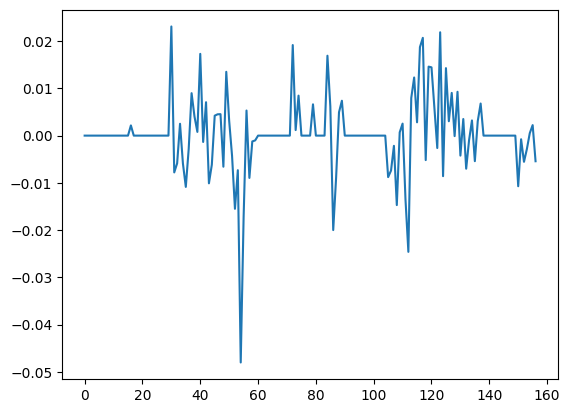

In [54]:
plt.plot(strategy_daily_returns)

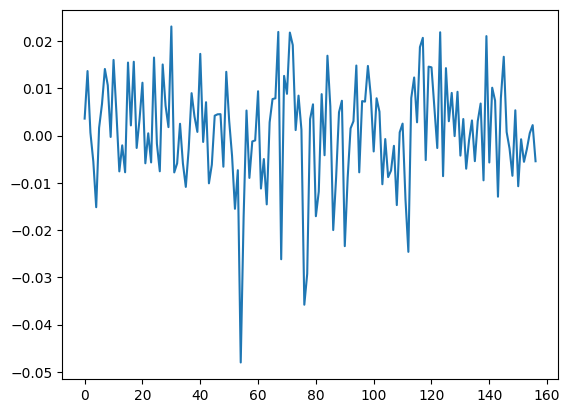

In [55]:
plt.plot(actuals_daily_returns)